# Introduction to neural networks


In this session we will start with a simple toy implementation of a neural network and apply it to the XOR problem. In the second part we will learn how to use the [Keras toolkit](https://keras.io/) to define, train and use practical neural network model.

## XOR

Let's start with the [XOR problem](https://en.wikipedia.org/wiki/XOR_gate). 

In [1]:
import numpy
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


### Exercise 7.1
Define the function `xor`, which which takes a Nx2 array, where each row is an input to the logical XOR. It outputs an array of size N with the corresponding outputs.

In [2]:
def xor(X):
    #.........
    

In [39]:
X = numpy.array([[0, 0],      # FALSE
                 [0, 1],      # TRUE
                 [1, 0],      # TRUE
                 [1, 1]])     # FALSE
y = xor(X)
print(y)

[0 1 1 0]


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


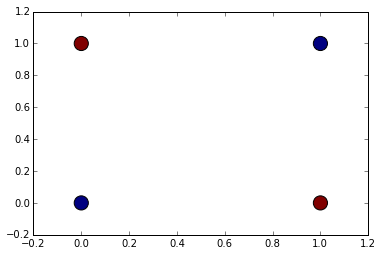

In [40]:
pylab.scatter(X[:,0], X[:,1], c=y, s=200)

## Neural network
We can define a simple two layer neural network by hand which solves the XOR classification problem. The network has parameters $\mathbf{W}$ and $\mathbf{U}$, and computes the following:

$$Y = \sigma(U(\sigma(WX^T))$$

Where $\mathbf{X}$ is the input array, with shape Nx2, $\mathbf{W}$ is a 2x2 matrix, and $\mathbf{U}$ is a 1x2 matrix. The result is a 1xN matrix (i.e. a single row vector) of XOR values.

### Exercise 7.2

Define function `sigma` which returns one if the input is greater than or equal to 0.5, and zero otherwise.

In [41]:
def sigma(X):
    #...............
    

In [42]:
z = numpy.random.uniform(0,1,(3,2))
print(z)
print(sigma(z))

[[ 0.45668192  0.08832069]
 [ 0.36929726  0.37415085]
 [ 0.42966176  0.50814711]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  1.]]


### Exercise 7.3

Define function `nnet` which takes the weight matrices W and U, and the input X, and returns the result Y computed according to the formula above.

In [43]:
def nnet(W,U,X):
    #..........................................
    

Define the weights:

In [44]:
W = numpy.array([[1,-1],
                 [-1,1]])
U = numpy.array([1,1])

Check what it outputs

In [45]:
y_pred = nnet(W, U, X)
print(y)
print(y_pred)


[0 1 1 0]
[ 0.  1.  1.  0.]


And plot the outputs as a function of inputs.

([], <a list of 0 Text yticklabel objects>)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


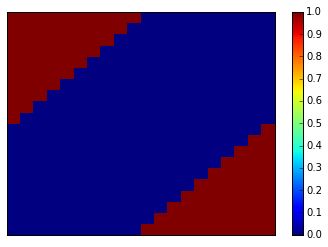

In [46]:
# Create a grid of points for plotting
shape=(20,20)
grid = numpy.array([ [i,j] for i in numpy.linspace(0,1,shape[0]) 
                               for j in numpy.linspace(0,1,shape[1]) ])
# Apply the neural net to all the points
y_pred = nnet(W, U, grid)
pylab.pcolor(y_pred.reshape((20,20)))
pylab.colorbar()
pylab.xticks([])
pylab.yticks([])

## Training XOR NN with Keras

We'll now learn how to build a simple neural network in Keras. 

In [47]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam

model = Sequential()
# Add two hidden layers with 4 hidden units each, and the tanh activation.

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='tanh'))

# The final layer is the output layer with an inverse logit activation function.
model.add(Dense(1, activation='sigmoid'))

# Use the Adam optimizer. Adam works similar to regular SGD, 
# but with some important improvements. 
optimizer = Adam(lr=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

We can now train the model, specifying number of epochs, size of the minibatch, and whether to print extra information.

In [48]:
model.fit(X, y, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s - loss: 0.7566     
Epoch 2/100
4/4 [==============================] - 0s - loss: 0.7268     
Epoch 3/100
4/4 [==============================] - 0s - loss: 0.7113     
Epoch 4/100
4/4 [==============================] - 0s - loss: 0.6974     
Epoch 5/100
4/4 [==============================] - 0s - loss: 0.6874     
Epoch 6/100
4/4 [==============================] - 0s - loss: 0.6850     
Epoch 7/100
4/4 [==============================] - 0s - loss: 0.6735     
Epoch 8/100
4/4 [==============================] - 0s - loss: 0.6702     
Epoch 9/100
4/4 [==============================] - 0s - loss: 0.6609     
Epoch 10/100
4/4 [==============================] - 0s - loss: 0.6523     
Epoch 11/100
4/4 [==============================] - 0s - loss: 0.6459     
Epoch 12/100
4/4 [==============================] - 0s - loss: 0.6398     
Epoch 13/100
4/4 [==============================] - 0s - loss: 0.6354     
Epoch 14/100
4/4 [================

In [49]:
model.predict(X)

array([[ 0.05815018],
       [ 0.88036031],
       [ 0.79122895],
       [ 0.11128785]], dtype=float32)

([], <a list of 0 Text yticklabel objects>)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


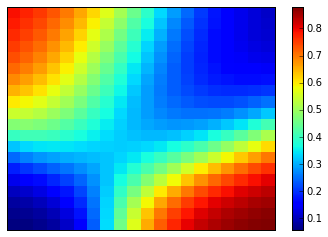

In [50]:
# Apply the neural net to all the points
y_pred = model.predict(grid)
pylab.pcolor(y_pred.reshape((20,20)))
pylab.colorbar()
pylab.xticks([])
pylab.yticks([])

## Regression with NN on iris

We will now define and train a neural network model for regression on the iris data.

### Load data

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data = load_iris()
# Inputs
X = numpy.array(data.data[:,0:3], dtype='float32')
# Output
y = numpy.array(data.data[:,3], dtype='float32')


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=999)
print(X_train.shape)
print(y_train.shape)

(100, 3)
(100,)


### Exercise 7.4


Define a multilayer perceptron with the following specifications:
- Hidden layer 1: size 16, activation: tanh
- Hidden layer 2: size 16, activation: tanh
- Output layer: size 1, activation: linear

Compile it using the following specifications:
- optimizer: Adam
- loss: mean squared error

Train the network, and try to find a good value of learning rate by monitoring the loss.

Compute mean absolute error and r-squared the validation data.

In [57]:
#..................................



Epoch 1/20
0s - loss: 2.0960
Epoch 2/20
0s - loss: 1.0082
Epoch 3/20
0s - loss: 0.5607
Epoch 4/20
0s - loss: 0.3876
Epoch 5/20
0s - loss: 0.3034
Epoch 6/20
0s - loss: 0.2505
Epoch 7/20
0s - loss: 0.2060
Epoch 8/20
0s - loss: 0.1695
Epoch 9/20
0s - loss: 0.1393
Epoch 10/20
0s - loss: 0.1151
Epoch 11/20
0s - loss: 0.0952
Epoch 12/20
0s - loss: 0.0812
Epoch 13/20
0s - loss: 0.0711
Epoch 14/20
0s - loss: 0.0642
Epoch 15/20
0s - loss: 0.0593
Epoch 16/20
0s - loss: 0.0559
Epoch 17/20
0s - loss: 0.0537
Epoch 18/20
0s - loss: 0.0527
Epoch 19/20
0s - loss: 0.0516
Epoch 20/20
0s - loss: 0.0502


0.184413
0.8979603617


## Classification

Let's now do classification. The target is a categorical vector. It will need to be transformed to an array of dummies. This transform is also called on-hot encoding.

In [74]:
# Inputs
X = numpy.array(data.data, dtype='float32')
# Output
y = numpy.array(data.target, dtype='int32')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=999)

# One-hot Indicator array for classes
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
# One hot encoder needs a 2D array
Y_train = onehot.fit_transform(y_train.reshape((y_train.shape[0], 1)))
Y_val   = onehot.transform(y_val.reshape((y_val.shape[0], 1)))

print(Y_train[:10,:])

[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


### Exercise 7.5

Define a multilayer perceptron with the following specifications:
- Hidden layer 1: size 16, activation: tanh
- Hidden layer 2: size 16, activation: tanh
- Output layer: size 3, activation: softmax

NB: softmax is a generalization of inverse logit to more than 2 classes. It converts class scores to class probabilities, while making sure than they sum up to 1:

```
def softmax(x):
    z = numpy.exp(x)
    return z/numpy.sum(z)
```

Compile it using the following specifications:
- optimizer: Adam
- loss: categorical_crossentropy

Train the network, and try to find a good value of learning rate by monitoring the loss.
Use the method `.predict_classes` to predict the targets on validation data.
Compute the classification accuracy on validation data.

In [81]:
#.....................................


Epoch 1/10
0s - loss: 0.9143
Epoch 2/10
0s - loss: 0.6538
Epoch 3/10
0s - loss: 0.5052
Epoch 4/10
0s - loss: 0.4263
Epoch 5/10
0s - loss: 0.3672
Epoch 6/10
0s - loss: 0.3001
Epoch 7/10
0s - loss: 0.2524
Epoch 8/10
0s - loss: 0.2245
Epoch 9/10
0s - loss: 0.2005
Epoch 10/10
0s - loss: 0.1904


In [82]:
#.....................................


0.98


### Exercise 7.6


Train a neural network classifier on the handwritten digits dataset. 
This dataset comes with scikit learn and can be accessed as follows:

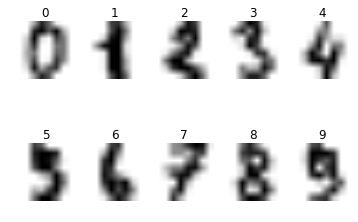

In [95]:
from sklearn.datasets import load_digits
digits = load_digits()
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    pylab.subplot(2, 5, index + 1)
    pylab.axis('off')
    pylab.imshow(image,cmap=plt.cm.gray_r)
    pylab.title('%i' % label)

The targets are in `digits.target` and the pixel values flattened into an array are in `digits.data`.

Train a classifier on the first 1000 of the images, and evaluate on the rest. 
Before testing the neural network model, check the classification error rate of a logistic regression classifier as a baseline.


Remember to convert the targets to the one-hot representation for training the neural network.

Some things to try when training a neural network model for this dataset:

- start with two or three hidden layers
- use between 32 to 128 units in each layer
- try different learning rates in the Adam optimizer (lr=0.001, lr=0.0001) and monitor the loss function
- train for at least 100 epochs
- try the `relu` activation function instead of `tanh`



In [107]:
# .....................


0.0740276035132


In [109]:
#.....................................



0.0627352572146
